In [1]:
from neuron import h, gui
import matplotlib.pyplot as plt

In [2]:
# Model Creation Block

soma = h.Section(name='soma')
soma.nseg = 1
soma.diam = 18.8
soma.L = 18.8
soma.cm = 1.0
soma.Ra = 123.0

soma.insert('hh')
soma.gnabar_hh = 0.25
soma.gkbar_hh = 0.036
soma.gl_hh = 0.000016667
soma.el_hh = -65.0
soma.ena = 50
soma.ek = -81

apical = h.Section(name='apical')
apical.nseg = 5
apical.diam = 3.18
apical.L = 701.9
apical.Ra = 123.0

apical.insert('hh')
apical.gnabar_hh = 0.01
apical.gkbar_hh = 0.0036
apical.gl_hh = 0.000016667
apical.el_hh = -65.0

In [3]:
apical.connect(soma(1), 0)

apical

In [4]:
ic = h.IClamp(soma(0.5))
ic.delay = 10.0
ic.dur = 2
ic.amp = 0.4

In [5]:
t = h.Vector().record(h._ref_t)
v = h.Vector().record(soma(0.5)._ref_v)

In [6]:
h.tstop = 40
h.dt = 0.025
h.v_init = -75

In [7]:
# Simulation for investigation of propagated action potentials

# Number of dendritic positions
nDist = 5  

# List for X-axis (distance)
distX = [0]  

# List for recording vectors
vvec = [v]

In [8]:
for i in range(1, nDist + 1):
    # normalized distance for section access (0 ~ 1)
    x = i / nDist  
    
    # measure distance
    distX.append(h.distance(soma(0.5), apical(x)))
    
    # record potential each position
    vvec.append(h.Vector().record(apical(x)._ref_v))

In [9]:
h.init()
h.run()

0.0

In [10]:
# Amplitude calculation

# List for Y-axis (amplitude)
distY = []  

for vv in vvec:
    # calculate amplitude
    distY.append(vv.max() - h.v_init)  

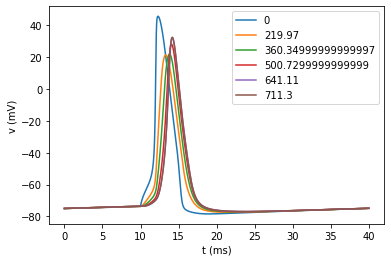

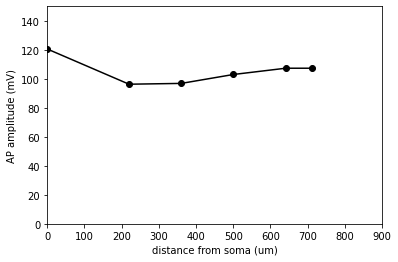

In [11]:
# Plot
plt.figure(0)

for vv in vvec:
    plt.plot(t, vv)
    
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.legend(distX)

plt.figure(1)

plt.plot(distX, distY, 'ko-')
plt.xlabel('distance from soma (um)')
plt.ylabel('AP amplitude (mV)')
plt.ylim(0, 150)
plt.xlim(0, 900)

plt.show()